In [1]:
# import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import nltk
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
# read in data
calendar=pd.read_csv('data/calendar.csv')
listings=pd.read_csv('data/listings.csv')
reviews=pd.read_csv('data/reviews.csv')

#### Business understanding

Airbnb is an online marketplace that connects hosts and guests for travel lodging or experiences. Airbnb serves as an alternative to hotels. Below are some advantanges and disadvantages of Airbnb compared to hotels.

Advantages: 
1. Could be less expensive than hotels
2. Adding benefits of kitchens and hostpitabilites.
3. Could be great for family travels.

Disadvantages:
1. For business travel, hotel might just be easier.
2. Airbnb experience is less standardized and might not be suitable for people who are looking for predictability. e.g. hosts can be more quirky or friendly than hotel staff; rooms could be less clean than hotels; price is determined by host, which is not necessarily cheaper than hotels.

On the other side of the market, hosts could make extra money by subletting one room or entire home while they're vacant. commerical rentals are possible but might not be advised in terms of short-termm renting regulations and how much money it would make. Disadvantages for hosts using Airbnb to sublet their rooms: some buildings are not allow for short-term sublease. Potential safety issues about guests. Could be intimidating for strangers staying in your home. 

**Some questions** to answer with this dataset
1. Can you describe the vibe of each Seattle neighborhood using listing descriptions?
2. What are the busiest times of the year to visit Seattle? By how much do prices spike?
3. What do people generally say about these listings? Is there any difference in these comments in different areas?
4. What variables contribute to price?

#### Data overview

Data are downloaded from https://www.kaggle.com/airbnb/seattle
Data are posted by Airbnb to Kaggle; original data are collected by Airbnb Inside, which is an personally funded site not associated with Airbnb. Data are scraped from Airbnb websites. More about Airbnb Inside and the original data can be found here http://insideairbnb.com/about.html


Three tables
- calendar includes one year's data - price and availability- scraped from the website. Could see time trends of price over the year and availability throughout the year. 
- listings include desciption about the place, host information, neighborhood information, room details, prices, availaiblities, reivew scores, and some other info. 
- reviews includes guest comments for the listings.

Explore dataset with `df.head()`, `df.info()`, `df.describe()`

In [3]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
#pd.options.display.max_columns = 10
#listings.info()
# 3818 listings, 2751 hosts

In [5]:
#reviews.head()

#### Data preparation

In [6]:
# clean up price column in listings. remove "$" and "," and convert to numerical values
listings['price']=listings['price'].map(lambda x: x.strip('$').replace(',', ''))
listings['price']=listings['price'].map(float)

In [7]:
# similary for caldenar, clean up price column (only where it's not nan) and change data type for date
calendar.loc[pd.notnull(calendar['price']),'price']=calendar.loc[pd.notnull(calendar['price']),'price'].map(lambda x: x.strip('$').replace(',', ''))
calendar['price']=calendar['price'].map(float)
calendar['date'] = pd.to_datetime(calendar['date'])

#### Evaluation

In [8]:
# word count for one listing description
# tried to group description by review scores to see if any difference between of description by review scores, 
# but majority of reviews are very good- scores 9 or 10
tokens = nltk.word_tokenize(listings['space'][0])
sw = set(stopwords.words('english'))
tokens = [x for x in tokens if x not in sw]
punc=['.', ',', '(', ')']
tokens = [x for x in tokens if x not in punc]
#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer() 
#tokens = [lemmatizer.lemmatize(x) for x in tokens]
from nltk.probability import FreqDist
fdist = FreqDist(tokens).most_common(10)
fdist

[('apartment', 3),
 ('The', 3),
 ('Queen', 2),
 ('Anne', 2),
 ('private', 2),
 ('unit', 2),
 ('bamboo', 2),
 ('bedroom', 2),
 ('two', 2),
 ("'s", 2)]

In [9]:
# what did reviewers say about the listings. word count of reviews by neighborhood
reviews=reviews.merge(listings[['id', 'neighbourhood_group_cleansed', 'host_name']], how='inner', left_on='listing_id', right_on='id')

In [10]:
tokens_all = []
stopwords_to_remove = set(stopwords.words('english'))
others_to_remove=['.', ',', '(', ')', '&', ':', '!', '-', '*', 'The', 'apartment', "'s", 'Seattle', 'This', 
                  'I', 'We', 'us', 'It', 'stay', 'place', 'host', "n't", 'would', 'room', 'home']
for comment in reviews.loc[(reviews['neighbourhood_group_cleansed']=='Central Area') & pd.notnull(reviews['comments']), 'comments'].tolist():
    tokens = nltk.word_tokenize(comment)
    tokens = [x for x in tokens if x not in stopwords_to_remove]
    tokens = [x for x in tokens if x not in others_to_remove]
    tokens_all = tokens_all + tokens

from nltk.probability import FreqDist
fdist = FreqDist(tokens_all).most_common(30)
fdist

[('great', 5102),
 ('clean', 2982),
 ('house', 2943),
 ('comfortable', 2464),
 ('location', 2296),
 ('nice', 2238),
 ('neighborhood', 1933),
 ('time', 1831),
 ('downtown', 1764),
 ('really', 1688),
 ('recommend', 1687),
 ('easy', 1595),
 ('everything', 1550),
 ('well', 1453),
 ('definitely', 1437),
 ('perfect', 1349),
 ('made', 1331),
 ('quiet', 1321),
 ('also', 1311),
 ('space', 1209),
 ('good', 1199),
 ('close', 1177),
 ('bus', 1177),
 ('experience', 1172),
 ('get', 1148),
 ('wonderful', 1131),
 ('needed', 1117),
 ('staying', 1098),
 ('bed', 1077),
 ('helpful', 1054)]

In [11]:
# need to download nltk if not used before otherwise will pop up TK errors
#nltk.download()

In [12]:
# scatter matrix of numerical variables to explore their relationships to price
# could use pandas plotting.scatter_matrix or seaborn pairplot
#pd.plotting.scatter_matrix(listings[['price', 'review_scores_value', 'square_feet', 'bedrooms', 'number_of_reviews']], 
#                           figsize = (9, 9))

# for seaborn pairplot, histogram diagnols don't accept nans so has to be kde diagnols
#sns.pairplot(listings, vars=['price', 'review_scores_value', 'square_feet', 'bedrooms', 'number_of_reviews'], diag_kind='kde')

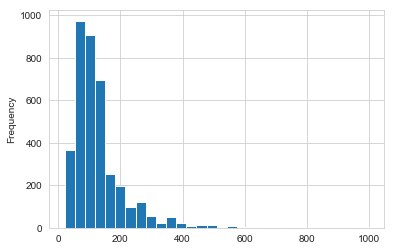

In [13]:
# histogram of listing prices
listings['price'].plot.hist(bins=30)
#plt.ylabel('price')

In [14]:
# describe listing prices
# listings['price'].describe()

In [15]:
# normalize price by bedrooms
listings.loc[listings['bedrooms']==0, 'bedrooms']=0.5
listings['price_per_bed']=listings['price']/(listings['bedrooms'])

In [16]:
# get average price by location. groupby and visuals. visual could be matplotlib errorbar or seaborn pointplot

In [17]:
# difference between neighborhood and neighbourhood_group_cleansed? choose one of the fields as location group
listings['neighbourhood'].unique()
#listings.loc[listings['neighbourhood_group_cleansed']=='Cascade', 'neighbourhood'].unique()
#listings.loc[listings['neighbourhood']=='Eastlake', 'neighbourhood_group_cleansed'].unique()

array(['Queen Anne', nan, 'Ballard', 'Phinney Ridge', 'Fremont',
       'Lower Queen Anne', 'Westlake', 'Wallingford', 'Green Lake',
       'Minor', 'Madrona', 'Harrison/Denny-Blaine', 'Leschi',
       'University District', 'Roosevelt', 'Madison Park', 'Capitol Hill',
       'Atlantic', 'North Beacon Hill', 'Central Business District',
       'Pike Place Market', 'Pike Market', 'Eastlake', 'Portage Bay',
       'South Lake Union', 'Magnolia', 'Belltown',
       'International District', 'Yesler Terrace', 'First Hill',
       'Pioneer Square', 'Gatewood', 'The Junction', 'Arbor Heights',
       'Alki', 'North Admiral', 'Crown Hill', 'Genesee', 'Fairmount Park',
       'Interbay', 'Industrial District', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'North Delridge',
  

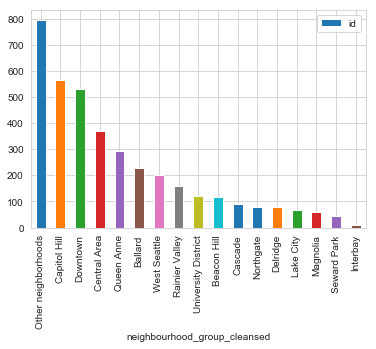

In [18]:
# number of lists by location
neighborcts=listings.groupby(['neighbourhood_group_cleansed'], as_index=False)['id'].count()
neighborcts.sort_values(by='id', ascending=False, inplace=True)
neighborcts.plot.bar(x='neighbourhood_group_cleansed', y='id')

In [19]:
# price by location
price_by_area=listings.groupby(['neighbourhood_group_cleansed'],as_index=False)['price'].agg([np.mean, 'sem', 'count', 'max', 'min', 'median']).reset_index()
price_by_area.sort_values(by='mean', ascending=False)

,neighbourhood_group_cleansed,mean,sem,count,max,min,median
9,Magnolia,177.672131,19.215612,61,950.0,30.0,129.0
12,Queen Anne,157.223729,6.745827,295,975.0,20.0,119.0
6,Downtown,154.405660,3.948565,530,999.0,35.0,139.0
16,West Seattle,141.359606,6.256949,203,495.0,30.0,109.0
3,Cascade,140.101124,11.890955,89,775.0,42.0,115.0
2,Capitol Hill,130.592593,3.882213,567,750.0,22.0,105.0
4,Central Area,128.338753,4.178198,369,500.0,35.0,100.0
0,Ballard,124.682609,5.797605,230,475.0,25.0,95.0
11,Other neighborhoods,119.968514,3.072625,794,1000.0,25.0,99.0
7,Interbay,109.727273,18.091731,11,250.0,50.0,90.0


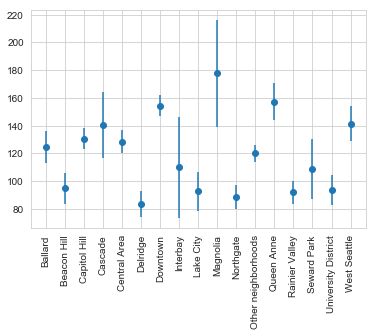

In [20]:
# matplotlib
plt.errorbar(x=price_by_area.index.tolist(), y=price_by_area['mean'], yerr=price_by_area['sem']*2,fmt='o')
plt.xticks(price_by_area.index.tolist())
plt.gca().set_xticklabels(price_by_area['neighbourhood_group_cleansed'],rotation=90);
#plt.show()
# sns.pointplot(x='neighbourhood_group_cleansed',y='price', data=listings, join=False)

In [21]:
# review by location
#review_by_area=listings.groupby(['neighbourhood_group_cleansed'],as_index=False)['review_scores_value'].agg([np.mean, 'sem', 'count', 'max', 'min', 'median']).reset_index()
#review_by_area.sort_values(by='mean', ascending=False)

In [22]:
# percent super host by location
#listings['host_is_superhost']=listings['host_is_superhost'].apply(lambda x: 1 if x=='t' else 0)
#pct_super_by_area=listings.groupby(['neighbourhood_group_cleansed'],as_index=False)['host_is_superhost'].mean()
#pct_super_by_area.sort_values(by='host_is_superhost', ascending=False)

In [23]:
## average price by review scores
#price_by_review=listings.groupby(['review_scores_value'],as_index=False)['price'].agg([np.mean, 'sem', 'count', 'max', 'min', 'median']).reset_index()
#price_by_review.sort_values(by='mean', ascending=False)
##plt.figure(figsize=(6.4,4.8))
#plt.errorbar(x=price_by_review.index.tolist(), y=price_by_review['mean'], yerr=price_by_review['sem']*2,fmt='o')
#plt.xticks(price_by_review.index.tolist())
#plt.gca().set_xticklabels(price_by_review['review_scores_value'],rotation=90)

In [37]:
# price by property type
price_by_bedType=listings.groupby(['property_type'],as_index=False)['price'].agg([np.mean, 'sem', 'count', 'max', 'min', 'median']).reset_index()
price_by_bedType.sort_values(by='mean', ascending=False)

,property_type,mean,sem,count,max,min,median
2,Boat,282.375000,99.464268,8,775.0,75.0,150.0
7,Condominium,151.109890,11.645511,91,700.0,50.0,115.0
10,Loft,135.700000,12.621573,40,425.0,25.0,102.5
9,House,132.351414,2.567373,1733,1000.0,25.0,95.0
13,Townhouse,129.457627,8.505843,118,498.0,28.0,97.0
0,Apartment,122.932670,1.611928,1708,999.0,20.0,110.0
5,Camper/RV,120.461538,26.452331,13,375.0,45.0,82.0
3,Bungalow,115.615385,20.864194,13,349.0,65.0,95.0
1,Bed & Breakfast,112.054054,9.180043,37,299.0,30.0,99.0
4,Cabin,104.666667,12.049567,21,300.0,52.0,95.0


In [25]:
# time trends for average price for each neighborhood. merge with listings to get neighborhood information first
#calendar['week']=calendar['date'].dt.week
calendar = pd.merge(calendar, listings[['id', 'neighbourhood_group_cleansed']], left_on='listing_id', right_on='id',how='inner')

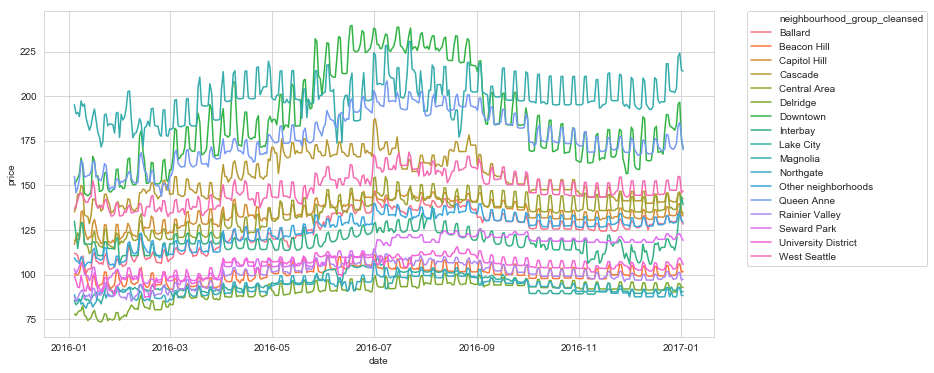

In [26]:
neighbor_avg_by_date=calendar.groupby(['neighbourhood_group_cleansed', 'date'], as_index=False)['price'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(data=neighbor_avg_by_date, x='date', y='price', hue='neighbourhood_group_cleansed')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### Modeling

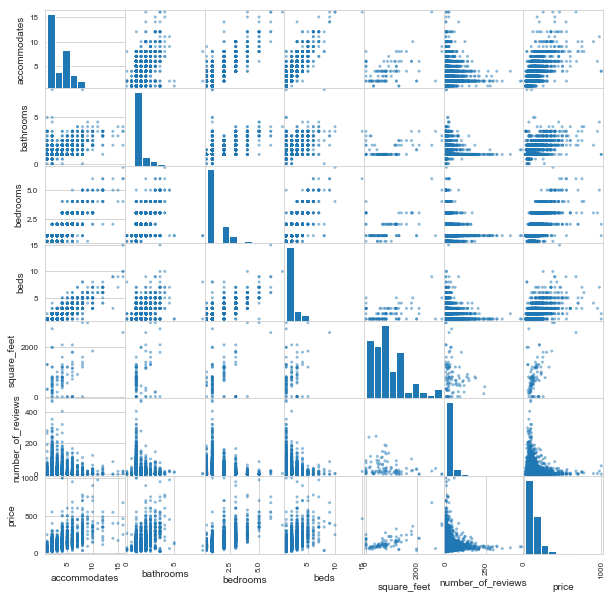

In [27]:
# keep only parameters that are possibly related to price
# listings.info()
#sns.set_context('talk') #rc={'axes.labelsize': 16})
listings_less = listings[['transit', 'neighbourhood_group_cleansed',
                         'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 
                         'amenities', 'square_feet', 'number_of_reviews', 'price']].copy()
#sns.pairplot(listings_less, diag_kind = 'kde')
pd.plotting.scatter_matrix(listings_less, figsize=(10,10));

In [28]:
#sns.reset_orig()

In [29]:
# handle missing values
# fill property_type as mode
# fill bathrooms, bedrooms, beds as median
# fill square_feet as 0 and add another column is_nan_square_feet as 1 to indicate nan values in square_feet
# fill blanks for missing transit
listings_less['property_type'] = listings_less['property_type'].fillna(listings_less['property_type'].mode())
for col in ['bathrooms', 'bedrooms', 'beds']:
    listings_less[col] = listings_less[col].fillna(listings_less[col].median())
listings_less.loc[pd.isnull(listings_less['square_feet']), 'square_feet'] = 0
listings_less.loc[listings_less['square_feet']<10, 'square_feet'] = 0 # change small values to zero
listings_less['is_nan_square_feet'] = 0
listings_less.loc[listings_less['square_feet']==0, 'is_nan_square_feet'] = 1 # add another column to indicate if nan square feet
listings_less.loc[pd.isnull(listings_less['transit']), 'transit'] = ''

In [30]:
# add dummy variables for categorical variables
listings_less_cat = listings_less.select_dtypes(include='object').copy()
listings_less_cat.drop(['transit', 'amenities'], axis=1, inplace=True)
listings_less_cat = pd.get_dummies(listings_less_cat)

In [31]:
listings_less_num = listings_less.select_dtypes(include=['float64', 'int64']).copy()
listings_less_num.drop(['price'], axis=1, inplace=True)

In [32]:
# extract text features from transit 
# tutorial for text classification https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
X_text=listings_less['amenities']
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vect = CountVectorizer()
X_text_counts = count_vect.fit_transform(X_text)
X_text_names = count_vect.get_feature_names()
print(X_text_counts.shape)
tfidf_transformer = TfidfTransformer()
X_text_tfidf = tfidf_transformer.fit_transform(X_text_counts)
print(X_text_tfidf.shape)

df_text = pd.DataFrame(data = X_text_tfidf.toarray(), columns = X_text_names)

(3818, 69)
(3818, 69)


In [33]:
X = pd.concat([listings_less_cat, listings_less_num], axis=1)
y = listings['price']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Coefficient of determination: {0:.2f}'.format(r2_score(y_test, y_pred)))

Coefficient of determination: 0.59


In [36]:
coefs_df = pd.DataFrame({'feature_name': X_train.columns, 'coefs': regr.coef_, 'abs_coefs': np.abs(regr.coef_)}, 
                        columns=['feature_name', 'coefs', 'abs_coefs'])
coefs_df.sort_values('abs_coefs', ascending=False).head(20)

,feature_name,coefs,abs_coefs
19,property_type_Boat,170.408109,170.408109
22,property_type_Camper/RV,84.547607,84.547607
31,property_type_Treehouse,46.434528,46.434528
27,property_type_Loft,44.901171,44.901171
25,property_type_Dorm,-43.403366,43.403366
43,bedrooms,38.713679,38.713679
6,neighbourhood_group_cleansed_Downtown,38.694222,38.694222
21,property_type_Cabin,34.430121,34.430121
35,room_type_Shared room,-32.342992,32.342992
18,property_type_Bed & Breakfast,32.307539,32.307539
